In [1]:
#import libraries 
import warnings                       #for avoid warnings
warnings.filterwarnings('ignore')
import pandas as pd                   #read the dataset
import numpy as nd                    #linear algebra
from matplotlib import pyplot as plt  #for plotting



In [2]:
df=pd.read_csv('weight-height.csv')  #read the dataset

In [3]:
df.head()                            #to show first five rows

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.isnull().sum()                #null value check

Gender    0
Height    0
Weight    0
dtype: int64

In [5]:
df1=df.copy()

In [6]:
#Transfer cadtegorical value to numeric value in 'Gender'column using ordinal encodeing method.
sex=df1.Gender.unique()

In [7]:
sex

array(['Male', 'Female'], dtype=object)

In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
ordinal=OrdinalEncoder(categories=[sex])    #creating an object

In [10]:
encoded_values=ordinal.fit_transform(df1[['Gender']])

In [11]:
encoded_values

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [12]:
df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [13]:
#convert encoded values into dataframe
encoded_values=pd.DataFrame(encoded_values,columns=['Gender'])

In [14]:
encoded_values.head()

,Gender
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [15]:
#drop 'Gender'column
df1=df1.drop('Gender',axis=1)

In [16]:
df1.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [17]:
#add ordinal'Gender' values
new_df1=pd.concat([encoded_values,df1],axis=1)

In [18]:
new_df1.head()          #to show first five rows for updated dataset

,Gender,Height,Weight
0,0.0,73.847017,241.893563
1,0.0,68.781904,162.310473
2,0.0,74.110105,212.740856
3,0.0,71.730978,220.042470
4,0.0,69.881796,206.349801


In [19]:
new_df1

,Gender,Height,Weight
0,0.0,73.847017,241.893563
1,0.0,68.781904,162.310473
2,0.0,74.110105,212.740856
3,0.0,71.730978,220.042470
4,0.0,69.881796,206.349801
...,...,...,...
8550,1.0,60.483946,110.565497
8551,1.0,63.423372,129.921671
8552,1.0,65.584057,155.942671
8553,1.0,67.429971,151.678405


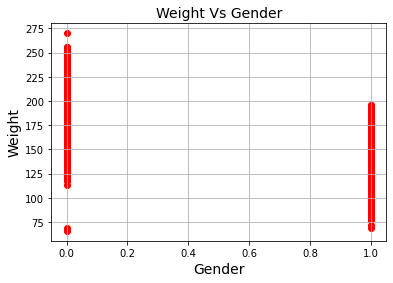

In [20]:
#try to prove linearity
plt.scatter(new_df1['Gender'], new_df1['Weight'], color='red')
plt.title('Weight Vs Gender', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Weight', fontsize=14)
plt.grid(True)
plt.show()

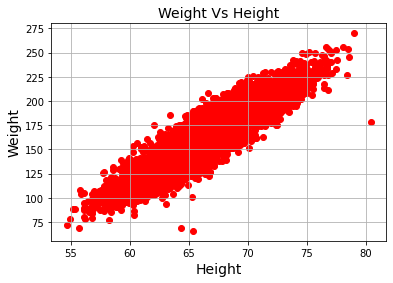

In [21]:
#try to prove linearity
plt.scatter(new_df1['Height'], new_df1['Weight'], color='red')
plt.title('Weight Vs Height', fontsize=14)
plt.xlabel('Height', fontsize=14)
plt.ylabel('Weight', fontsize=14)
plt.grid(True)
plt.show()

In [22]:
#Divide x and y
x = new_df1[['Gender','Height']]
y = new_df1['Weight']

In [23]:
x.head()

,Gender,Height
0,0.0,73.847017
1,0.0,68.781904
2,0.0,74.110105
3,0.0,71.730978
4,0.0,69.881796


In [24]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split as tts

In [26]:
#train 70%; test=30%
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=.30)

In [27]:
xtrain.head()

,Gender,Height
1422,0.0,72.369934
5177,1.0,61.520609
6759,1.0,65.200073
7309,1.0,62.356371
5602,1.0,64.026960


In [28]:
ytrain.head()

1422    224.603811
5177    127.390661
6759    148.078099
7309    120.662529
5602    138.876406
Name: Weight, dtype: float64

In [29]:
xtest.head()

,Gender,Height
7271,1.0,64.428289
1211,0.0,64.699294
7671,1.0,65.690735
7773,1.0,67.311599
6678,1.0,64.860659


In [30]:
ytest.head()

7271    138.225737
1211    155.664255
7671    139.179987
7773    153.910290
6678    159.568226
Name: Weight, dtype: float64

# Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression 

In [32]:
reg = LinearRegression()      #creating an object

In [33]:
reg.fit(xtrain,ytrain)        #training

LinearRegression()

In [34]:
#finding coefficient
m=reg.coef_
m

array([-19.86544654,   5.94650294])

In [35]:
#finding intercept
c=reg.intercept_
c

-223.35682577175282

In [36]:
#from 'Gender'column x1=0.0 and from 'Height'column x2=71.83944
x1=0.0
m1=-19.69169249
x2=71.839443
m2=5.93814664
y=m1*x1+m2*x2+c

In [37]:
y

203.23632129816872

In [38]:
reg.predict([[0.0,68.781904]])

array([185.65496859])

In [39]:
pred=reg.predict(xtest)

In [40]:
pred

array([139.9007361 , 161.37771908, 147.40787739, ..., 170.46507472,
       201.9781879 , 145.32841909])

In [41]:
new_df1['predicted result']=reg.predict(x)

In [42]:
new_df1.head()

,Gender,Height,Weight,predicted result
0,0.0,73.847017,241.893563,215.774678
1,0.0,68.781904,162.310473,185.654969
2,0.0,74.110105,212.740856,217.339134
3,0.0,71.730978,220.042470,203.191648
4,0.0,69.881796,206.349801,192.195479


In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [44]:
mse=mean_squared_error(ytest,pred)

In [45]:
mse

108.17493755222195

In [46]:
mae= mean_absolute_error(ytest,pred)

In [47]:
mae

8.080169355401202

In [48]:
#measuring accuracy
r2_score(ytest,pred)

0.8943286771900334

# KNN Regression

In [49]:
from sklearn.neighbors import KNeighborsRegressor

In [50]:
neigh = KNeighborsRegressor(n_neighbors=5)   #crating an object

In [51]:
neigh.fit(xtrain,ytrain)                     #training

KNeighborsRegressor()

In [52]:
pred1=neigh.predict(xtest)

In [53]:
pred1

array([140.7556853 , 164.66884796, 153.1834599 , ..., 169.8665578 ,
       203.46770668, 146.71340118])

In [54]:
mse=mean_squared_error(ytest,pred1)

In [55]:
mse

127.41562340072193

In [56]:
mae= mean_absolute_error(ytest,pred1)

In [57]:
mae

8.88205835392832

In [58]:
#measuring accuracy
r2_score(ytest,pred1)

0.8755333002627256

# Summary

In [ ]:
Accuracy for Linear Regression =89% and accuracy for KNN Regression =87%.So accuracy for linear regrssion is greater than 
for accuracy in KNN regression.

In [ ]:
mse for Linear Regression =108.17493755222195 and mse for KNN regression=127.41562340072193.

In [ ]:
mae for Linear Regression=8.080169355401202 and mae for KNN regression=8.88205835392832